In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm 
import patsy

/Users/hsu022210/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Homework Assignment \#1

*due Thursday, February 15, 2018 at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homeowrk_01.ipynb``` file as a template and write the answers in text and include relevant code below each question. 

### Question 1

In the SLR model, the probability distribution of $Y$ (i.e., $Y_i$) has the same mean and variance for all levels of $X$ (i.e., $X_i$). True or False? Explain.

False, if $\beta_1$ is 0 means there is no realtionship between $Y$ and $X$ then the probability distribution of $Y$ has the same mean and variance for all levels of $X$, but if $\beta_1$ is not 0 then the probability distribution of $Y$ has the same variance but not guarantee same mean for all levels of $X$.

### Question 2

The number of points above the fitted regression line is always equal to the number of points below it. True or False? Explain.

False, if there are data points really seperate from where the most of data points cluster, then it will affect the fitted regression line lean to it more.

### Question 3

In a SLR model, what does $\beta_1$ measure?  

The slope, which represent the relationship between dependant variable and independant variable.

### Question 4

In the context of an SLR model, prove the following:

- $E[Y_i] = \beta_0 + \beta_1 X_i$ 
- $V(Y_i) = \sigma^2 \hspace{5pt} \forall \hspace{5pt} i$ 

- $E[Y_i] = \beta_0 + \beta_1 X_i$ :
> $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$    
> $E[Y_i] = E[\beta_0 + \beta_1 X_i + \epsilon_i]$        
> $E[Y_i] = E[\beta_0] + E[\beta_1 X_i] + E[\epsilon_i]$        
> $E[Y_i] = \beta_0 + \beta_1 E[X_i] + E[\epsilon_i]$        
> $E[Y_i] = \beta_0 + \beta_1 X_i + E[\epsilon_i]$        
> $E[Y_i] = \beta_0 + \beta_1 X_i$

- $V(Y_i) = \sigma^2 \hspace{5pt} \forall \hspace{5pt} i$
> $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$   
> $V[Y_i] = V[\beta_0 + \beta_1 X_i + \epsilon_i]$   
> $V[Y_i] = V[\beta_0] + V[\beta_1 X_i] + V[\epsilon_i]$   
> $V[Y_i] = V[\epsilon_i] = \sigma^2$    
> $V[Y_i] = \sigma^2$ 

### Question 5

For the SLR model, $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$, how many random variables are there. Explain.

Two, the $Y_i$ and  $\epsilon_i$, all the other variables are either parameter or constant. Since $\epsilon_i$ is error term, we should expect it to be random value for each time. $Y_i$ is the result of a funciton involves $\epsilon_i$, that makes $Y_i$ a random variable as well.

### Question 6

Write out the normal error regression model and its assumptions (in English and math).

HW2

### Question 7

What does a negative value of $\beta_1$ indicate about the relation between $X$ and $Y$?

$$ b_0 = \frac{1}{n} \Big( \sum Y_i - b_1 \sum X_i \Big) $$
$$ b_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$$

When $\beta_1$ is negative means we have negative slope relationship for X and Y, so if value of X go up, value of Y would go down.

### Question 8

***DO NOT USE ANY REGRESSION FUNCTIONS OR REGRESSION PACKAGES FOR THIS PROBLEM***

Using the following code

In [2]:
x = np.random.uniform(9, 27, 1000)
y = 0.5*x + np.random.uniform(-2, 2, 1000)
myData = pd.DataFrame(pd.concat([pd.Series(x), pd.Series(y)], axis = 1))
myData.rename(columns={0: "x", 1: "y"}, inplace = True)

manually compute the coefficients $b_0$ and $b_1$ for the SLR model.

In [3]:
myData.head()

,x,y
0,26.948640,12.222808
1,9.190925,4.600614
2,10.241198,6.509530
3,19.374845,10.406579
4,19.675710,10.952958


In [4]:
b1_fraction_up = 0
b1_fraction_down = 0
x_mean = myData.x.mean()
y_mean = myData.y.mean()

for index, row in myData.iterrows():
    b1_fraction_up += (row.x - x_mean) * (row.y - y_mean)
    b1_fraction_down += (row.x - x_mean)**2
b1 = b1_fraction_up / b1_fraction_down

print("b1:", b1)

b0 = (1 / len(myData.index)) * (myData.y.sum() - b1 * myData.x.sum())
print("b0:", b0)

b1: 0.486104380673
b0: 0.183460998932


### Question 9

Prove the equivalence of the $F$-Test and the $t$-Test on $\beta_1$ for an SLR model. 

HW2

### Question 10

Are hypotheses tested concerning the actual values of the coefficients, e.g., $\beta_1$, or their estimated values, e.g., $b_1$? Why?

It's concerning the actual values of the coefficients, e.g., $\beta_1$, because we are using $b_1$ to test if we should reject that $\beta_1=0$ or not 

### Question 11

You compute a coefficient of determination for a regression model an obtain an $R^2=0.832$. What does the strength of the coefficient of determination say about the causal relationship between the explanatory and response variables?

HW2

### Question 12

You compute a coefficient of determination for a regression model, regressing crime rate per capita ($Y$) on the size of municipal police force ($X$), obtaining an $R^2 = 0.6533$. What can you say about the relationship between $Y$ and $X$?

HW2

### Question 13

From the discussion of SLR so far, how do you believe outliers will effect the regression line? 

Since outliers are really seperate from where the most of data points cluster, so it will make the fitted regression line lean to it more.

### Question 14

Write out the hypothesis test which tests for the statistical significance of $\beta_1$ for an SLR model. Be sure to include the null an alternate hypothesis, the critical value including degrees of freedom (two-tailed test) for $\alpha = 0.05$ and an interpretation of both possible results. 

$H_0: \beta_1=0$    
$H_a: \beta_1\neq0$    
$t*=b_1/s\{b_1\}$    
If $\mid t*\mid <= t(1-0.025;n-2)$, do not reject $H_0$    
If $\mid t*\mid > t(1-0.025;n-2)$, reject $H_0$

### Question 15

Using ```modified_SENIC_data_01.csv```
1. Regress Infection Risk ($Y$) on Length of Stay ($X$). Report the $R^2$, $b_0$ and $b_1$  values.
2. Multiply the observations, both $X$ and $Y$, by 192; we will refer to these as $X_{(2)}$ and $Y_{(2)}$. Regress $Y_{(2)}$ on $X_{(2)}$. Report the $R^2$, $b_0$ and $b_1$  values.
3. Multiply only $Y$ by 47; we will refer to this as $Y_{(3)}$. Regress $Y_{(3)}$ on $X$. Report the $R^2$, $b_0$ and $b_1$  values.
4. Multiply only $X$ by 12; we will refer to this as $X_{(3)}$. Regress $Y$ on $X_{(3)}$. Report the $R^2$, $b_0$ and $b_1$  values.


**Succinctly** explain what you have gleaned from this exercise. Include a summarized tabular representation of the regression output and the associated $R^2$, $b_0$ and $b_1$ values.

In [5]:
senic_data = pd.read_csv('modified_SENIC_data_01.csv')
senic_data.head()

,lengthOfStay,age,infectionRisk
0,7.13,55.7,4.1
1,8.82,58.2,1.6
2,8.34,56.9,2.7
3,8.95,53.7,5.6
4,11.20,56.5,5.7


In [6]:
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senic_data)
senicResid = senicOLSmodel.fit()
print("R^2:", senicResid.rsquared)
print("b0:", senicResid.params[0])
print("b1:", senicResid.params[1])

R^2: 0.284562320773
b0: 0.74430374596
b1: 0.374216862681


In [7]:
senic_data_192 = senic_data.copy()
senic_data_192.loc[:,'infectionRisk'] *= 192
senic_data_192.loc[:,'lengthOfStay'] *= 192
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senic_data_192)
senicResid = senicOLSmodel.fit()
print("R^2:", senicResid.rsquared)
print("b0:", senicResid.params[0])
print("b1:", senicResid.params[1])
senic_data_192.head()

R^2: 0.284562320773
b0: 142.906319224
b1: 0.374216862681


,lengthOfStay,age,infectionRisk
0,1368.96,55.7,787.2
1,1693.44,58.2,307.2
2,1601.28,56.9,518.4
3,1718.40,53.7,1075.2
4,2150.40,56.5,1094.4


In [8]:
senic_data_47 = senic_data.copy()
senic_data_47.loc[:,'infectionRisk'] *= 47
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senic_data_47)
senicResid = senicOLSmodel.fit()
print("R^2:", senicResid.rsquared)
print("b0:", senicResid.params[0])
print("b1:", senicResid.params[1])
senic_data_47.head()

R^2: 0.284562320773
b0: 34.9822760601
b1: 17.588192546


,lengthOfStay,age,infectionRisk
0,7.13,55.7,192.7
1,8.82,58.2,75.2
2,8.34,56.9,126.9
3,8.95,53.7,263.2
4,11.20,56.5,267.9


In [9]:
senic_data_12 = senic_data.copy()
senic_data_12.loc[:,'lengthOfStay'] *= 12
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senic_data_12)
senicResid = senicOLSmodel.fit()
print("R^2:", senicResid.rsquared)
print("b0:", senicResid.params[0])
print("b1:", senicResid.params[1])
senic_data_12.head()

R^2: 0.284562320773
b0: 0.74430374596
b1: 0.0311847385567


,lengthOfStay,age,infectionRisk
0,85.56,55.7,4.1
1,105.84,58.2,1.6
2,100.08,56.9,2.7
3,107.40,53.7,5.6
4,134.40,56.5,5.7


By multiplying both $Y$ and $X$ with same value, we can see that only intercept $\beta_0$ changed, which makes sense, since they multiply same times of value so the relationship remain the same, it's just the anchor of data is different.

By mutiplying only $Y$, we can see that intercept $\beta_0$ and slope $\beta_1$ both changed, because we are changing the dependant variable but the independant variable remains the same, which means there should be a new $\beta_0$ and a new $\beta_1$ to output the new $Y$

By mutiplying only $X$, we can see that only slope $\beta_1$ changed, because we are changing the independant variable but the dependant variable remains the same, which means only the relationship between $Y$ and $X$ changed, so it makes sense that only $\beta_1$ changed.

R squared value remains the same in all mutiplying scenario, since the standard deviation doesn't change by multiplying $Y$ or $X$.

### Question 16

Using the ```fourDataSets.csv```, regress $Y$ on $X$ for $i=1,2,3,4$, i.e., generate four separate SLR models. **For each** of the four data sets, run and report summary statistics, generate a scatter plot and run a SLR model, reporting the regression function $R^2$, $R_a^2$, and the significance of $b_1$ ($p$-value). Intelligently discuss what you observe about each data set and the data sets as a whole.

In [10]:
fourDataSets_data = pd.read_csv('fourDataSets.csv')
fourDataSets_data.tail()

,dataSet,x,y
39,4,8,5.25
40,4,19,12.50
41,4,8,5.56
42,4,8,7.91
43,4,8,6.89


In [11]:
fourDataSets_data_1 = fourDataSets_data[fourDataSets_data.dataSet == 1]
fourDataSets_data_2 = fourDataSets_data[fourDataSets_data.dataSet == 2]
fourDataSets_data_3 = fourDataSets_data[fourDataSets_data.dataSet == 3]
fourDataSets_data_4 = fourDataSets_data[fourDataSets_data.dataSet == 4]
fourDataSets_data_1.tail()

,dataSet,x,y
6,1,6,7.24
7,1,4,4.26
8,1,12,10.84
9,1,7,4.82
10,1,5,5.68


/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 15 Feb 2018   Prob (F-statistic):            0.00217
Time:                        02:49:46   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

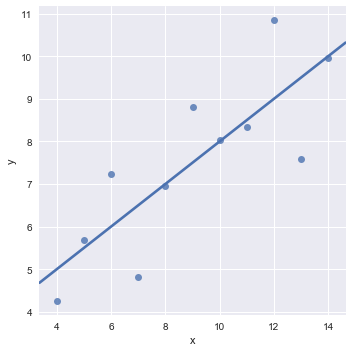

In [12]:
fourDataSets_1_plot = sns.lmplot("x", "y", data=fourDataSets_data_1, ci = None)
fdsOLSmodel = sm.OLS.from_formula('y ~ x', fourDataSets_data_1)
fdsResid = fdsOLSmodel.fit()
fdsResid.summary()

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 15 Feb 2018   Prob (F-statistic):            0.00218
Time:                        02:49:46   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

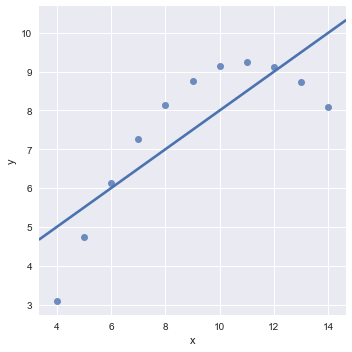

In [13]:
fourDataSets_2_plot = sns.lmplot("x", "y", data=fourDataSets_data_2, ci = None)
fdsOLSmodel = sm.OLS.from_formula('y ~ x', fourDataSets_data_2)
fdsResid = fdsOLSmodel.fit()
fdsResid.summary()

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 15 Feb 2018   Prob (F-statistic):            0.00218
Time:                        02:49:47   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

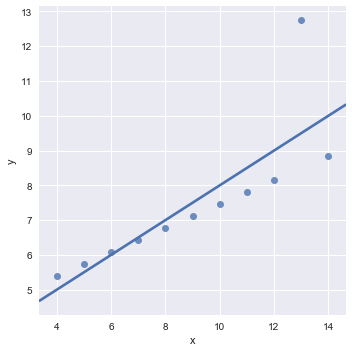

In [14]:
fourDataSets_3_plot = sns.lmplot("x", "y", data=fourDataSets_data_3, ci = None)
fdsOLSmodel = sm.OLS.from_formula('y ~ x', fourDataSets_data_3)
fdsResid = fdsOLSmodel.fit()
fdsResid.summary()

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Thu, 15 Feb 2018   Prob (F-statistic):            0.00216
Time:                        02:49:47   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

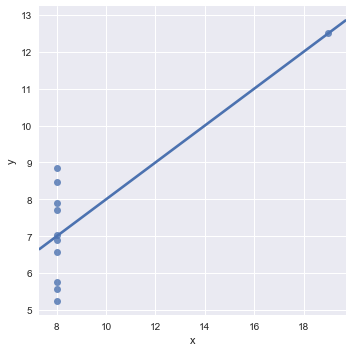

In [15]:
fourDataSets_4_plot = sns.lmplot("x", "y", data=fourDataSets_data_4, ci = None)
fdsOLSmodel = sm.OLS.from_formula('y ~ x', fourDataSets_data_4)
fdsResid = fdsOLSmodel.fit()
fdsResid.summary()

From the summaries and scatter plots for 4 datasets we can see that there are no big difference for intercept, slope, r-squared, adj r-squared, and p-value, but from the scatter plot we can see that data points are obviously not the same among 4 datasets, which means although the data look really different in the plot from these datasets, but it may have almost same linear regression equation for data.